In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [200]:
df1=pd.read_csv("WineQT.csv")
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [201]:
df1.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [202]:
df1.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [203]:
#no null values

In [204]:
df1.shape

(1143, 13)

In [205]:
df1.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1138    False
1139    False
1140    False
1141    False
1142    False
Length: 1143, dtype: bool

In [206]:
df1.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [207]:
df1.duplicated().sum()

0

In [208]:
df2=df1.drop_duplicates()
df2
df2.shape

(1143, 13)

df2

In [210]:
df2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [211]:
df2.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

In [212]:
df3=df2.drop('Id', axis=1)
df3

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


In [213]:
#check for outliers

In [214]:
df3.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


fixed acidity              Axes(0.125,0.53;0.0945122x0.35)
volatile acidity        Axes(0.238415,0.53;0.0945122x0.35)
citric acid             Axes(0.351829,0.53;0.0945122x0.35)
residual sugar          Axes(0.465244,0.53;0.0945122x0.35)
chlorides               Axes(0.578659,0.53;0.0945122x0.35)
free sulfur dioxide     Axes(0.692073,0.53;0.0945122x0.35)
total sulfur dioxide    Axes(0.805488,0.53;0.0945122x0.35)
density                    Axes(0.125,0.11;0.0945122x0.35)
pH                      Axes(0.238415,0.11;0.0945122x0.35)
sulphates               Axes(0.351829,0.11;0.0945122x0.35)
alcohol                 Axes(0.465244,0.11;0.0945122x0.35)
quality                 Axes(0.578659,0.11;0.0945122x0.35)
dtype: object

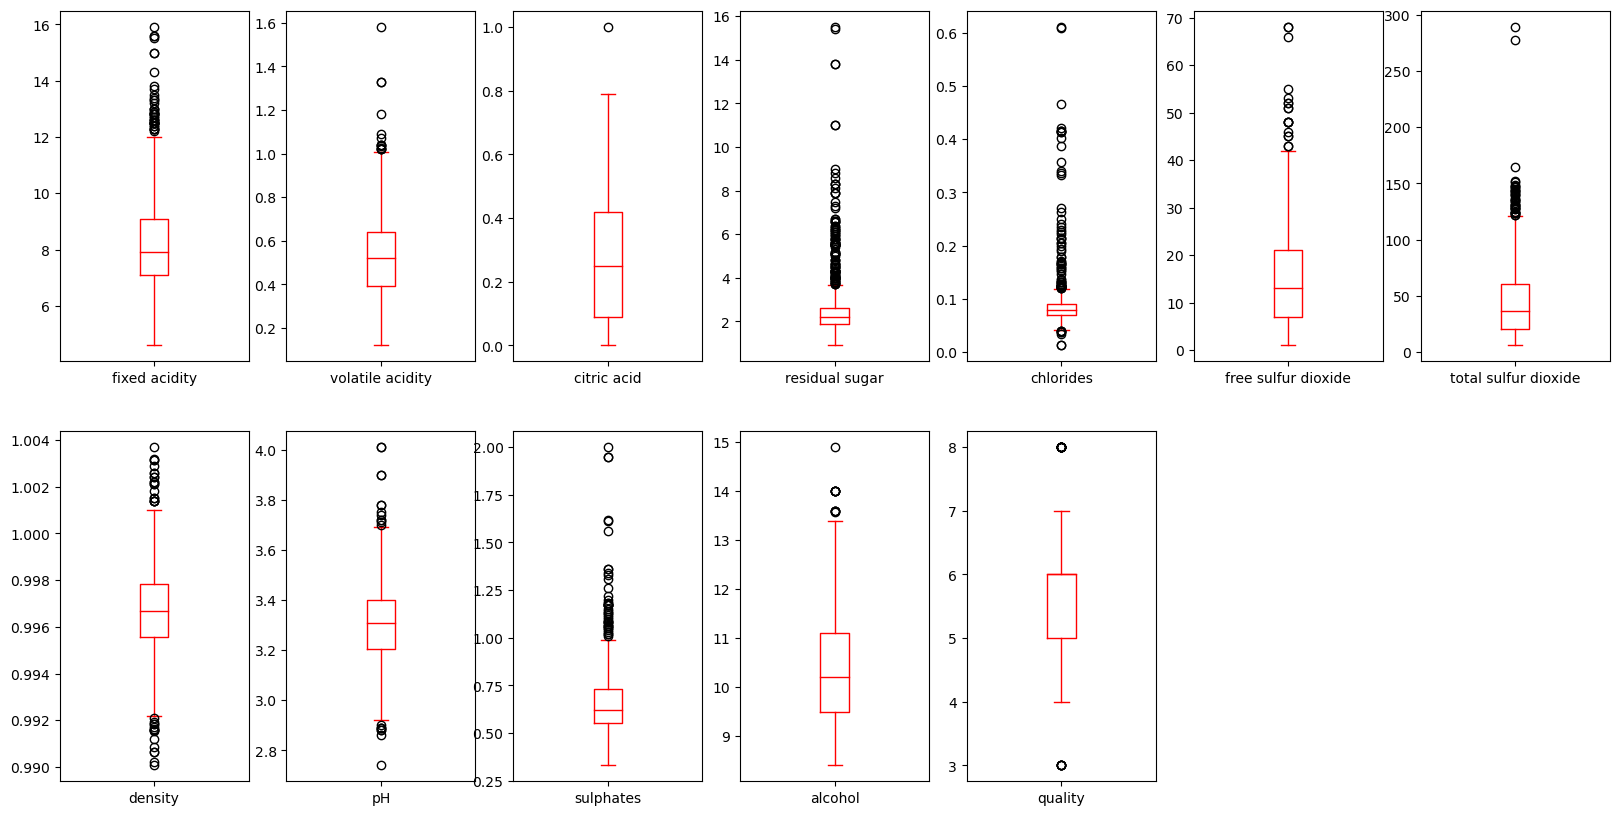

In [215]:
df3.plot(kind='box', subplots=True, layout=(2,7),
sharex=False,sharey=False, figsize=(20, 10),
color='red')

In [216]:
#quite a few outliers which means we need to work on most of the parameters except for the quality

In [217]:
input_columns=df3.columns[:-1].tolist()

In [218]:
def replace_outliers_with_mean_tukey(df3, column):
    Q1 = df3[column].quantile(0.25)
    Q3 = df3[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df3[column] = np.where((df3[column] < lower_bound) | (df3[column] > upper_bound), df3[column].mean(), df3[column])

In [219]:
for column in input_columns:
    if np.issubdtype(df3[column].dtype, np.number): 
        replace_outliers_with_mean_tukey(df3, column)

fixed acidity              Axes(0.125,0.53;0.0945122x0.35)
volatile acidity        Axes(0.238415,0.53;0.0945122x0.35)
citric acid             Axes(0.351829,0.53;0.0945122x0.35)
residual sugar          Axes(0.465244,0.53;0.0945122x0.35)
chlorides               Axes(0.578659,0.53;0.0945122x0.35)
free sulfur dioxide     Axes(0.692073,0.53;0.0945122x0.35)
total sulfur dioxide    Axes(0.805488,0.53;0.0945122x0.35)
density                    Axes(0.125,0.11;0.0945122x0.35)
pH                      Axes(0.238415,0.11;0.0945122x0.35)
sulphates               Axes(0.351829,0.11;0.0945122x0.35)
alcohol                 Axes(0.465244,0.11;0.0945122x0.35)
quality                 Axes(0.578659,0.11;0.0945122x0.35)
dtype: object

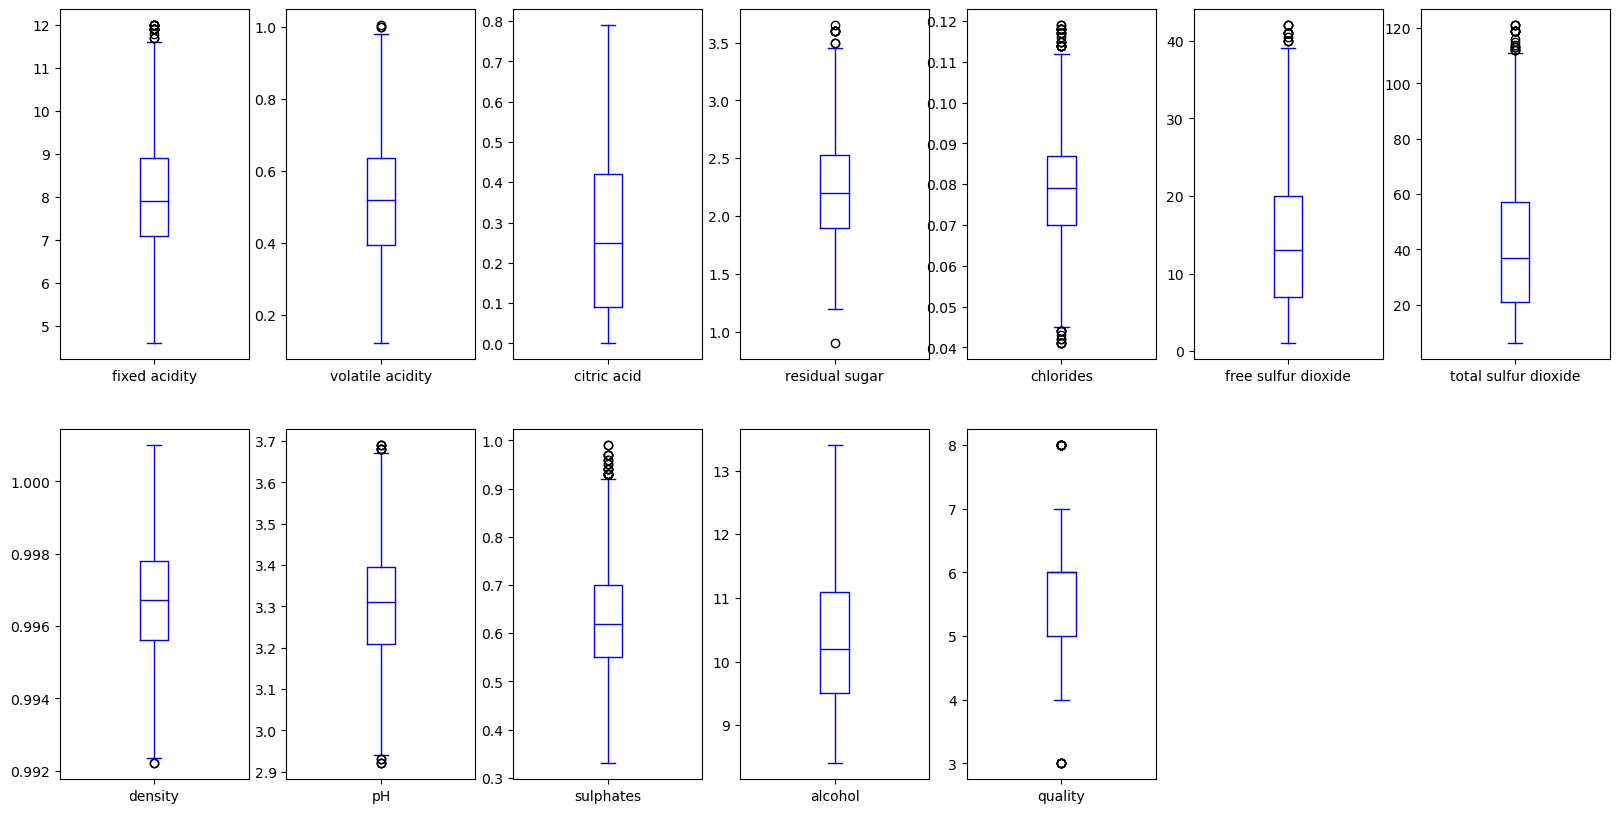

In [220]:
df3.plot(kind='box', subplots=True, layout=(2,7),
sharex=False,sharey=False, figsize=(20, 10),
color='blue')

In [221]:
#It is time to check if there are any correlation in the data-heatmap design

In [222]:
df3.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.244506,0.609566,0.238860,0.259415,-0.150768,-0.111498,0.559312,-0.610469,0.175161,-0.071671,0.109036
volatile acidity,-0.244506,1.000000,-0.557250,0.017366,0.137304,-0.004467,0.100057,-0.004007,0.207870,-0.341086,-0.214717,-0.384638
citric acid,0.609566,-0.557250,1.000000,0.204388,0.132122,-0.058356,-0.015525,0.342986,-0.533675,0.297196,0.127161,0.249034
residual sugar,0.238860,0.017366,0.204388,1.000000,0.218742,0.020915,0.118599,0.391524,-0.085848,0.056891,0.099483,0.025087
chlorides,0.259415,0.137304,0.132122,0.218742,1.000000,-0.017566,0.104882,0.385213,-0.211730,-0.062171,-0.290207,-0.167664
free sulfur dioxide,-0.150768,-0.004467,-0.058356,0.020915,-0.017566,1.000000,0.611980,-0.052868,0.065397,0.008743,-0.056491,-0.053266
total sulfur dioxide,-0.111498,0.100057,-0.015525,0.118599,0.104882,0.611980,1.000000,0.100380,-0.002366,-0.041274,-0.237678,-0.182895
density,0.559312,-0.004007,0.342986,0.391524,0.385213,-0.052868,0.100380,1.000000,-0.249085,0.124638,-0.475125,-0.165418
pH,-0.610469,0.207870,-0.533675,-0.085848,-0.211730,0.065397,-0.002366,-0.249085,1.000000,-0.016755,0.142629,-0.066510
sulphates,0.175161,-0.341086,0.297196,0.056891,-0.062171,0.008743,-0.041274,0.124638,-0.016755,1.000000,0.208036,0.400270


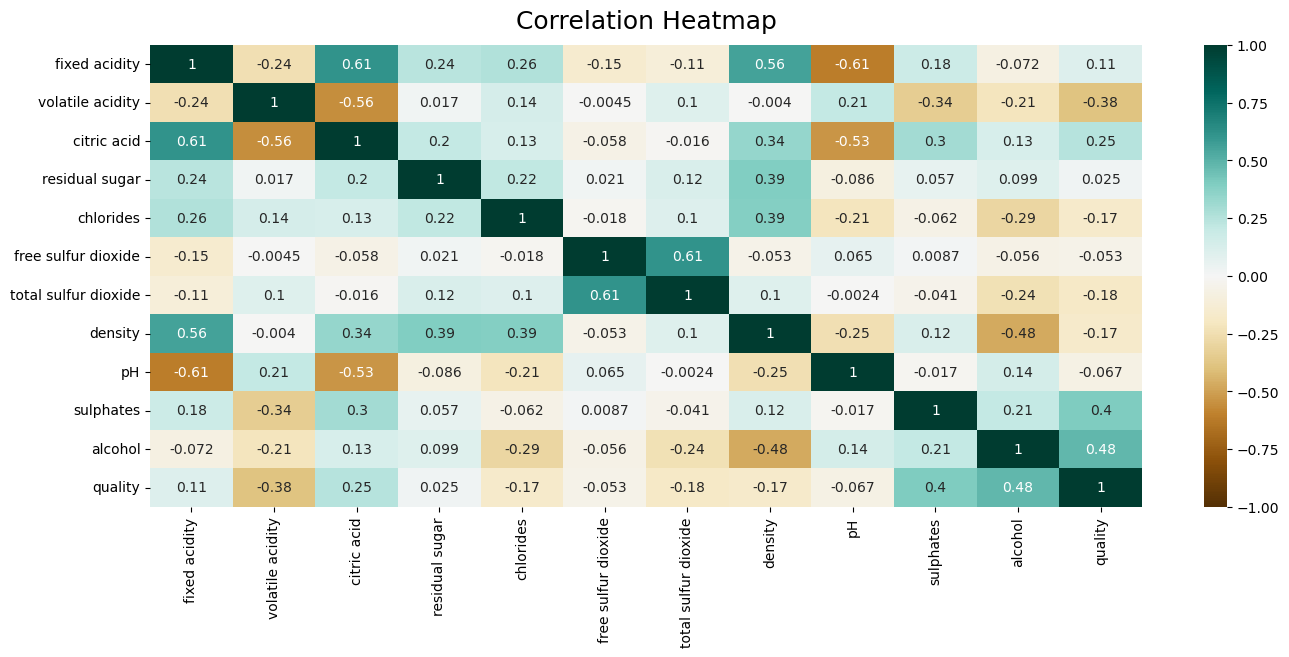

In [223]:
plt.figure(figsize=(16,6))
heatmap=sns.heatmap(df3.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [224]:
#As we can see there is positive correlation with quality and sulphates as well as alcohol. Negative correlation is between quality and volatile acidity,
#chlorides,, sulphur dioxide, density, pH etc.
#But there are strong correlations in the variables of the data set. This means that we need to solve the multicollinearity issue!!!

In [225]:
#Let's examine the distribution pattern of the target variable ("quality")

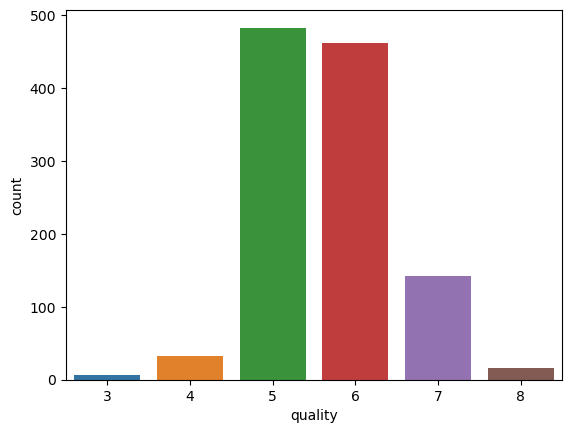

In [226]:
sns.countplot(x="quality", data=df3)
plt.show()

In [227]:
#It kinda looks like a normal distribution

In [228]:
df3["quality"].value_counts()

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

In [229]:
# So as we can see there is imbalanced data which we need to take care of.
#But first we need to normalize the data,--> Standard Scaler

In [230]:
#let's make the train and test datasets

In [231]:
X = df3.drop('quality', axis=1)
y = df3['quality'] - df3['quality'].min()

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=43)

In [232]:
#We need to standardize the data sets

In [233]:
from sklearn.preprocessing import StandardScaler

In [234]:
scale=StandardScaler()

In [235]:
X_train_scale=scale.fit_transform(X_train)
X_test_scale=scale.fit_transform(X_test)


In [236]:
# Now we need to resample with SMOTE so we can get over with the imbalanced data problem

In [237]:
pip install -U imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [238]:
from imblearn.over_sampling import SMOTE

In [239]:
oversample=SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=3) 


In [240]:
X_train_resample, y_train_resample= oversample.fit_resample(X_train_scale, y_train)

In [241]:
pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [242]:
pip install catboost

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [243]:
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn import metrics

from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [244]:
classifiermodel = {'CatBoost Classifier': CatBoostClassifier(verbose=False, random_state=999),
              'RF Classifier': RandomForestClassifier(n_estimators=100, random_state=999),
              'LightGBM Classifier': LGBMClassifier(n_estimators=100,random_state=999),
              'XGBoost Classifier' : XGBClassifier (objective='multi:softprob')}

#Train and evaluate each classifier
for name, clf in classifiermodel.items():
    clf.fit(X_train_resample, y_train_resample)
    y_pred = clf.predict(X_test_scale)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f'{name} Accuracy: {accuracy}')

CatBoost Classifier Accuracy: 0.5982532751091703
RF Classifier Accuracy: 0.6026200873362445
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001088 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2800
[LightGBM] [Info] Number of data points in the train set: 2274, number of used features: 11
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM Classifier Accuracy: 0.5938864628820961
XGBoost Classifier Accuracy: 0.5764192139737991


In [248]:
#We will also examine the logistic regression,
logr = LogisticRegression()
logr.fit(X_train_resample, y_train_resample)

   

LogisticRegression()

In [252]:
logr = LogisticRegression()
logr.fit(X_train_resample, y_train_resample)
ypred1=logr.predict(X_test_scale)

In [256]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, ypred1)
print(confusion_matrix)

[[ 0  1  0  0  0  0]
 [ 1  4  1  0  0  0]
 [ 6 27 50 19  7  4]
 [ 5 16 13 24 20  5]
 [ 0  0  1  1 12  9]
 [ 0  0  0  0  2  1]]


In [258]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.08      0.67      0.15         6
           2       0.77      0.44      0.56       113
           3       0.55      0.29      0.38        83
           4       0.29      0.52      0.38        23
           5       0.05      0.33      0.09         3

    accuracy                           0.40       229
   macro avg       0.29      0.38      0.26       229
weighted avg       0.61      0.40      0.46       229



In [260]:
#So it looks that classification Random Forest is the best model !!!